# Question 1: Linear Regression and Gradient Descent

In [253]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [254]:
# Loading data
x = np.loadtxt("DataX.dat")
y = np.loadtxt("DataY.dat")

np.set_printoptions(precision=2, suppress=True)

# Fetching length of data and adding X0 (bias term)
m = len(x)
x = np.column_stack((np.ones(m), x))

print(x.shape, y.shape)

(50, 4) (50,)


In [255]:
x

array([[   1., 2104.,    3.,    2.],
       [   1., 1600.,    3.,    2.],
       [   1., 2400.,    3.,    2.],
       [   1., 1416.,    2.,    1.],
       [   1., 3000.,    4.,    3.],
       [   1., 1985.,    4.,    3.],
       [   1., 1534.,    3.,    2.],
       [   1., 1427.,    3.,    2.],
       [   1., 1380.,    3.,    2.],
       [   1., 1494.,    3.,    2.],
       [   1., 1940.,    4.,    3.],
       [   1., 2000.,    3.,    2.],
       [   1., 1890.,    3.,    2.],
       [   1., 4478.,    5.,    3.],
       [   1., 1268.,    3.,    2.],
       [   1., 2300.,    4.,    3.],
       [   1., 1320.,    2.,    1.],
       [   1., 1236.,    3.,    2.],
       [   1., 2609.,    4.,    3.],
       [   1., 3031.,    4.,    3.],
       [   1., 1767.,    3.,    2.],
       [   1., 1888.,    2.,    1.],
       [   1., 1604.,    3.,    2.],
       [   1., 1962.,    4.,    3.],
       [   1., 3890.,    3.,    2.],
       [   1., 1100.,    3.,    2.],
       [   1., 1458.,    3.,    2.],
 

In [256]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500., 189900., 309900.,
       269500.])

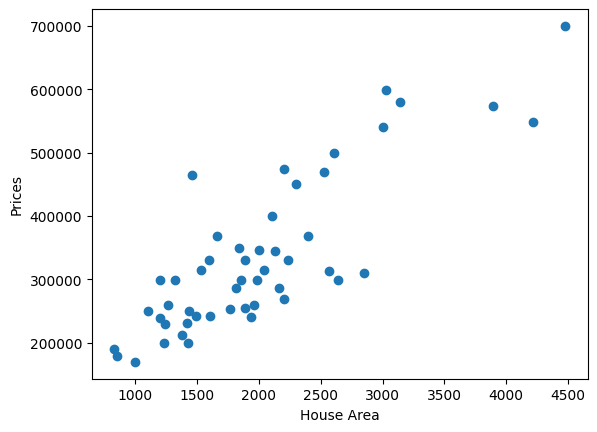

In [257]:
# Plot Data
plt.scatter(x[:,1], y)
plt.xlabel('House Area')
plt.ylabel('Prices')
plt.show()

In [258]:
# Normalize features (excluding the intercept term)
X_min = np.min(x[:, 1:], axis=0)
X_max = np.max(x[:, 1:], axis=0)
x[:, 1:] = (x[:, 1:] - X_min) / (X_max - X_min)

## a) Gradient descent
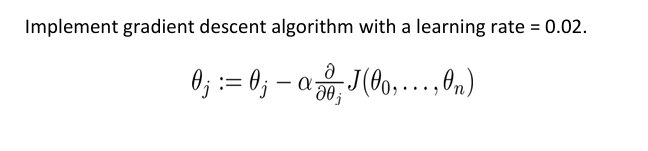

In [259]:
# Gradient Descent Function
def gd(x, y, alpha, iterations):
    m, n = x.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(iterations):
        predict = np.dot(x, theta)
        errors = predict - y
        gradient = np.dot(x.T, errors) / m
        temp = theta - (alpha * gradient)
        theta = temp
        # Compute RMSE
        rmse = np.sqrt((1 / m) * np.sum(np.power(errors, 2)))

        cost_history.append(rmse)
        
        if i % 1000 == 0:  # Print RMSE for every 1000th iteration
            print(f"Iteration: {i}, RMSE: {rmse}")
    
    print(f"Final RMSE: {rmse}")
    return theta, cost_history

# Setting alpha and number of iterations
alpha = 0.02
iterations = 3500

# Running gradient descent and getting theta values
theta_gd, cost_history = gd(x, y, alpha, iterations)
print("Updated Theta (Gradient Descent):", theta_gd)


Iteration: 0, RMSE: 356940.77357474866
Iteration: 1000, RMSE: 78504.38928026106
Iteration: 2000, RMSE: 69828.04238677626
Iteration: 3000, RMSE: 67205.16823034428
Final RMSE: 66711.64453106186
Updated Theta (Gradient Descent): [176865.39 432571.82  74959.2  -34893.61]


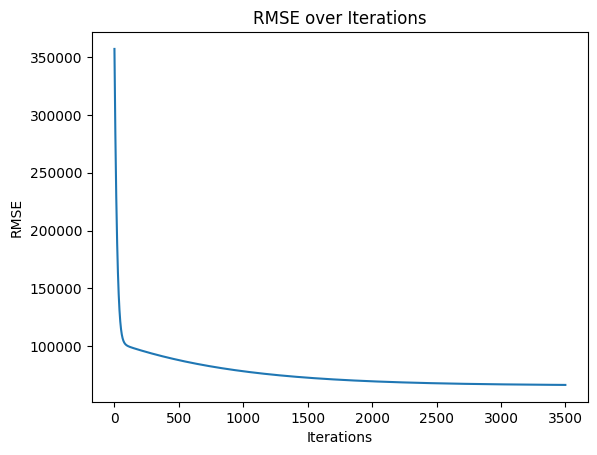

In [260]:
# Plot RMSE history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('RMSE over Iterations')
plt.show()

## b) Closed Form Solution

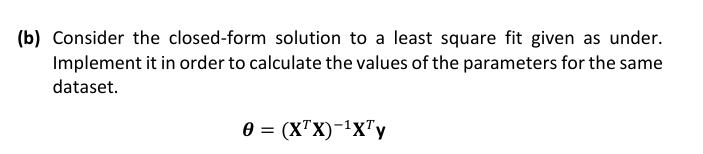

In [261]:
# Closed-Form Solution (Normal Equation)
X_transpose = np.transpose(x)
X_transpose_X = np.dot(X_transpose, x)
X_transpose_y = np.dot(X_transpose, y)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)
theta_CF = np.dot(X_transpose_X_inv, X_transpose_y)

print("Theta (Closed-Form Solution):", theta_CF)

Theta (Closed-Form Solution): [ 145043.29  465287.8   212151.87 -126000.19]


## c) Visualization

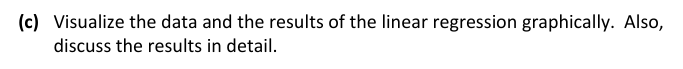

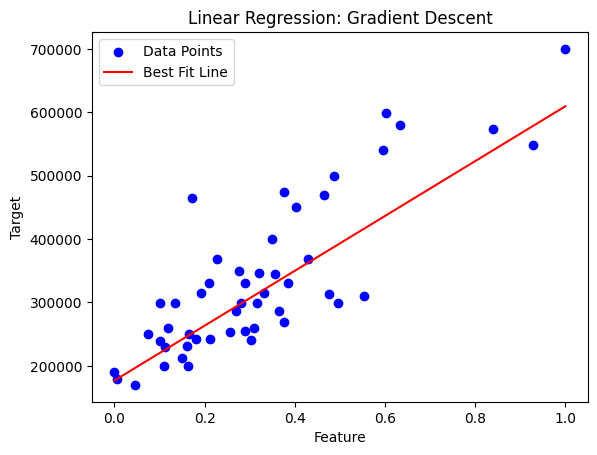

In [262]:
#visualization of gradient descent
x_plot = x[:, 1]
x_min = np.min(x_plot)
x_max = np.max(x_plot)
x_line = np.array([x_min, x_max])

y_line = theta_gd[0] + theta_gd[1] * x_line

plt.scatter(x_plot, y, color="Blue", label='Data Points')
plt.plot(x_line, y_line, color="Red", label='Best Fit Line')

plt.title('Linear Regression: Gradient Descent')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.show()


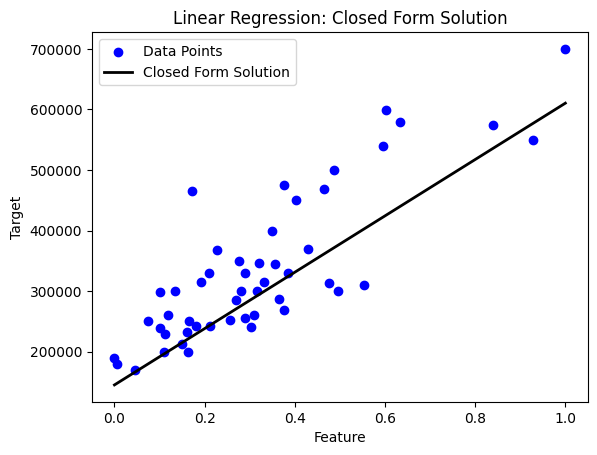

In [263]:
#visualization of closed form soltuion
plt.scatter(x[:, 1], y, color='blue', label='Data Points')

x_min = np.min(x[:, 1])
x_max = np.max(x[:, 1])
x_line = np.array([x_min, x_max])
# Calculate the corresponding y values
y_line = theta_CF[0] + theta_CF[1] * x_line
plt.plot(x_line, y_line, color='black', label='Closed Form Solution', linewidth=2)
# Title and labels
plt.title('Linear Regression: Closed Form Solution')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
# Show the plot
plt.show()

# Logistic Regression

In [264]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm
def logistic_regression(X, y, alpha, iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(iterations):
      
        z = np.dot(X, theta)
        z = np.clip(z, -500, 500) 
        h = sigmoid(z)
        error = h - y
       
        gradient = np.dot(X.T, error) / m
        
        theta -= alpha * gradient
        
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        cost_history.append(cost)
        
        if i % 1000 == 0:  
            print(f"Iteration: {i}, Cost: {cost}")
    
    print(f"Final Cost: {cost}")
    return theta, cost_history


DataX = np.loadtxt("DataX.dat")
ClassY = np.loadtxt("ClassY.dat")


DataX_norm = normalize(DataX)
X = np.hstack([np.ones((DataX_norm.shape[0], 1)), DataX_norm])


alpha = 0.02
iterations = 5000
threshold = 0.5  

theta_lr, cost_history = logistic_regression(X, ClassY, alpha, iterations)

print("Learned Theta (Logistic Regression):", theta_lr)

predictions = sigmoid(np.dot(X, theta_lr)) >= threshold

predictions = predictions.astype(int)

accuracy = np.mean(predictions == ClassY) * 100
print(f"Training Accuracy: {accuracy}%")

print(f"House classification (1 = Costly, 0 = Not Costly):\n{predictions}")

Iteration: 0, Cost: 0.6931471805599453
Iteration: 1000, Cost: 0.6603418168599805
Iteration: 2000, Cost: 0.6585617366991673
Iteration: 3000, Cost: 0.6571973175442601
Iteration: 4000, Cost: 0.6561578494127922
Final Cost: 0.6553725069310978
Learned Theta (Logistic Regression): [ 0.17 -0.35  0.46 -0.7 ]
Training Accuracy: 64.0%
House classification (1 = Costly, 0 = Not Costly):
[1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 1 1 0 1]
